# Titanic Dataset Analytics
**Tools:** Python, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn  
**Purpose:** Analyze the Titanic dataset to explore patterns and build a predictive model for passenger survival.


In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')


## Load Dataset
Load Titanic dataset from CSV file


In [6]:
df = pd.read_csv("Titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Exploration and Cleaning

In [14]:
print("Basic information: ")
print(df.head())

Basic information: 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500

In [16]:
print("Statistical Summary: ")
print(df.describe())

Statistical Summary: 
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [18]:
print("Columns Information: ")
print(df.info( ))

Columns Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [23]:
# check for missing values
print("Missing values: ")
print(df.isnull().sum())

Missing values: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [27]:
# Handle missing values (Imputation - replace with the mean or median)
df ['Age'] = df['Age'].fillna(df['Age'].median())
df ['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [31]:
# Drop unnecessary columns 
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

Overall survival rate:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


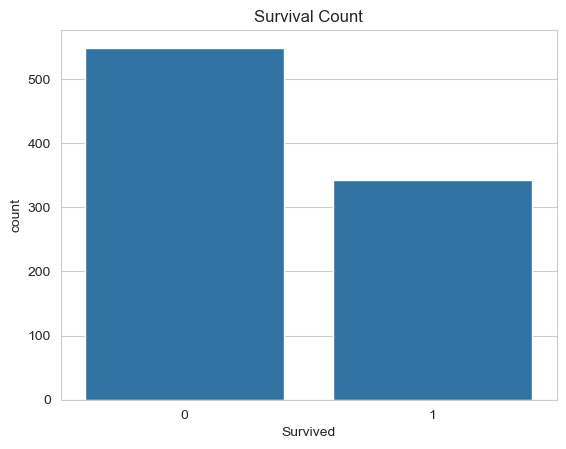

In [34]:
# Survival rate overall
print("Overall survival rate:")
print(df['Survived'].value_counts(normalize=True))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

Survival rate by Gender:
Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64


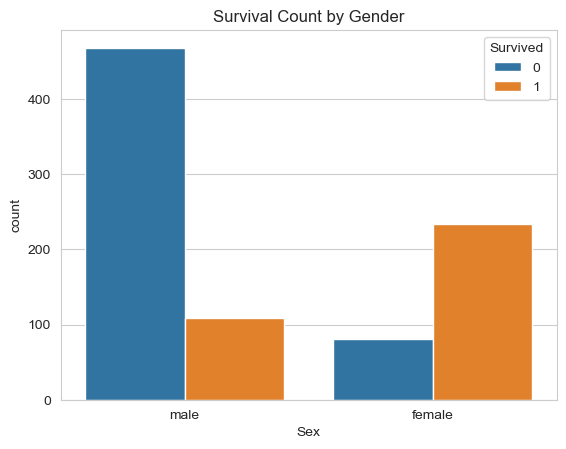

In [36]:
# Survival rate by Gender
print("Survival rate by Gender:")
print(df.groupby('Sex')['Survived'].value_counts(normalize=True))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()

Survival rate by Passenger Class:
Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64


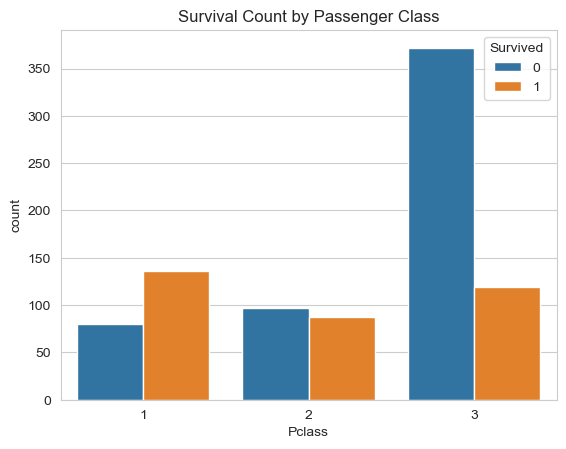

In [38]:
# Survival rate by Passenger Class (Pclass)
print("Survival rate by Passenger Class:")
print(df.groupby('Pclass')['Survived'].value_counts(normalize=True))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()

Survival rate by Embarkation Port:
Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: proportion, dtype: float64


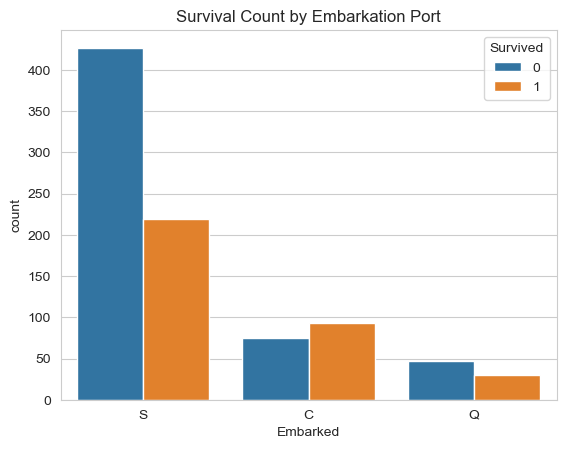

In [40]:
# Survival rate by Embarkation Port
print("Survival rate by Embarkation Port:")
print(df.groupby('Embarked')['Survived'].value_counts(normalize=True))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival Count by Embarkation Port")
plt.show()

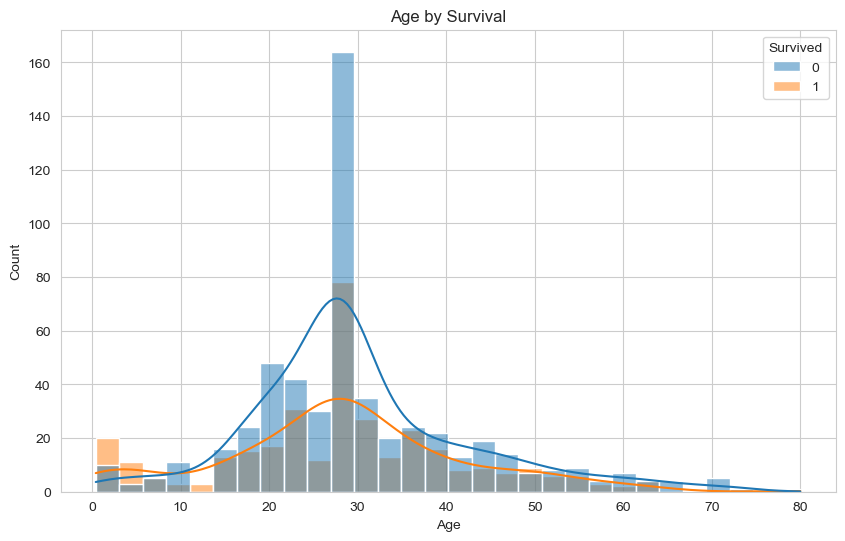

In [42]:
# Survival rate by Age
plt.figure(figsize=(10,6))
sns.histplot(df, x='Age', hue='Survived', kde=True)
plt.title("Age by Survival")
plt.show()

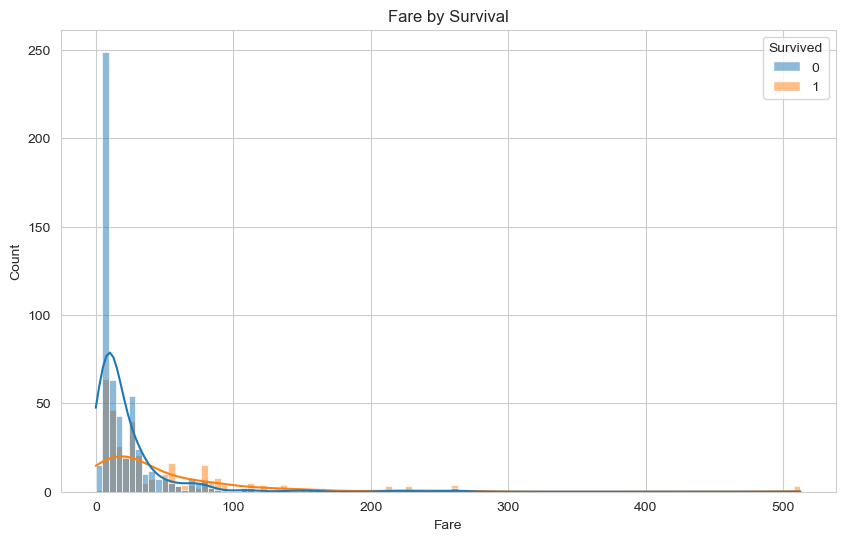

In [44]:
# Survival rate by Fare
plt.figure(figsize=(10,6))
sns.histplot(df, x='Fare', hue='Survived', kde=True)
plt.title("Fare by Survival")
plt.show()

Survival rate by SibSp:
SibSp  Survived
0      0           0.654605
       1           0.345395
1      1           0.535885
       0           0.464115
2      0           0.535714
       1           0.464286
3      0           0.750000
       1           0.250000
4      0           0.833333
       1           0.166667
5      0           1.000000
8      0           1.000000
Name: proportion, dtype: float64


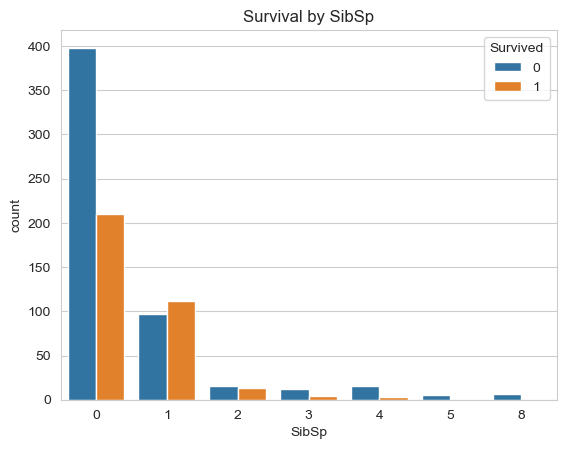

In [46]:
# Survival rate by SibSp (Siblings/Spouses aboard)
print("Survival rate by SibSp:")
print(df.groupby('SibSp')['Survived'].value_counts(normalize=True))
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('Survival by SibSp')
plt.show()

Survival rate by Parch:
Parch  Survived
0      0           0.656342
       1           0.343658
1      1           0.550847
       0           0.449153
2      0           0.500000
       1           0.500000
3      1           0.600000
       0           0.400000
4      0           1.000000
5      0           0.800000
       1           0.200000
6      0           1.000000
Name: proportion, dtype: float64


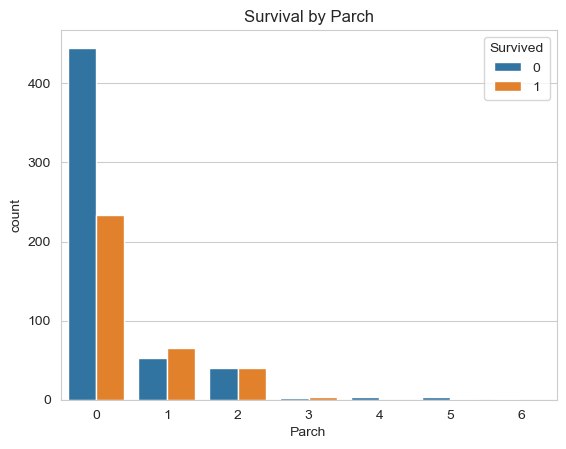

In [48]:
# Survival rate by Parch (Parents/Children aboard)
print("Survival rate by Parch:")
print(df.groupby('Parch')['Survived'].value_counts(normalize=True))
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Survival by Parch')
plt.show()

# Feature Engineering

Survival rate by Family Size:
FamilySize  Survived
1           0           0.696462
            1           0.303538
2           1           0.552795
            0           0.447205
3           1           0.578431
            0           0.421569
4           1           0.724138
            0           0.275862
5           0           0.800000
            1           0.200000
6           0           0.863636
            1           0.136364
7           0           0.666667
            1           0.333333
8           0           1.000000
11          0           1.000000
Name: proportion, dtype: float64


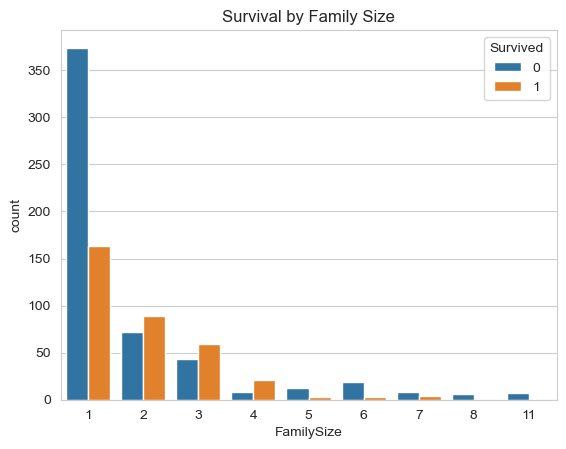

In [51]:
# Create a 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 

print("Survival rate by Family Size:")
print(df.groupby('FamilySize')['Survived'].value_counts(normalize=True))
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival by Family Size')
plt.show()

In [53]:
# Convert categorical variables to numerical (one-hot encoding)
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'])

# Correlation Analysis

In [56]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

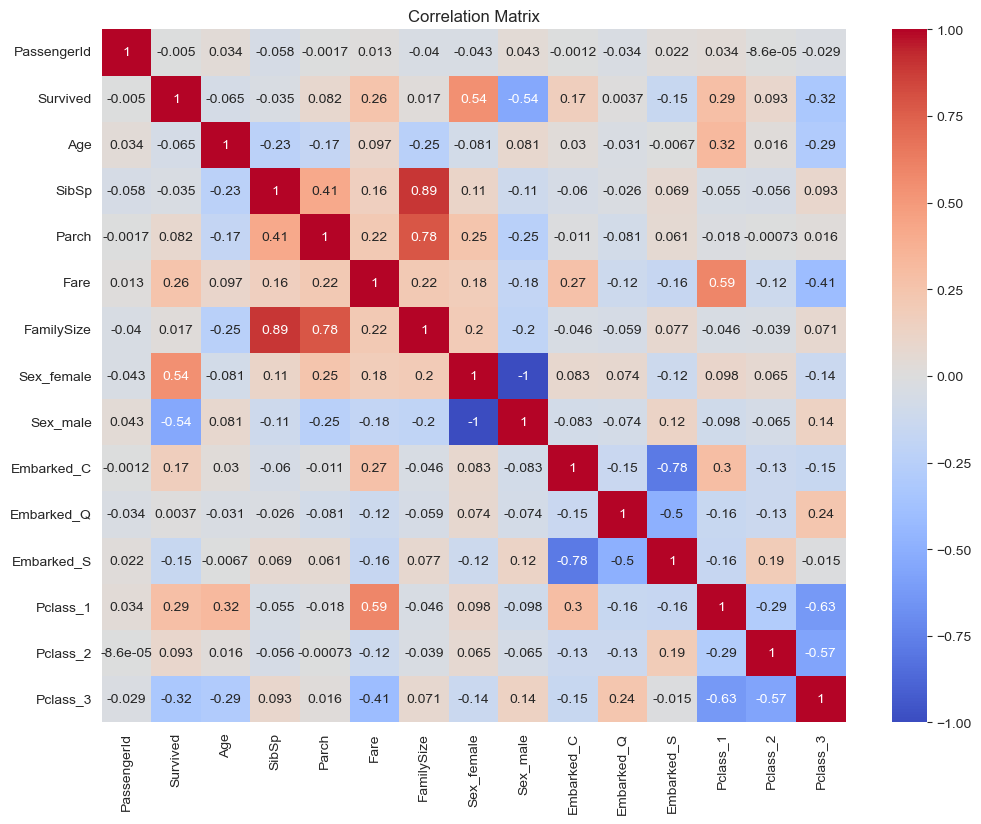

In [58]:
# Plot the correlation matrix
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [60]:
print("Correlations with Survived:")
print(correlation_matrix['Survived'].sort_values(ascending=False))

Correlations with Survived:
Survived       1.000000
Sex_female     0.543351
Pclass_1       0.285904
Fare           0.257307
Embarked_C     0.168240
Pclass_2       0.093349
Parch          0.081629
FamilySize     0.016639
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked_S    -0.149683
Pclass_3      -0.322308
Sex_male      -0.543351
Name: Survived, dtype: float64


# 5. Conclusion and Interpretation
After running the code and analyzing the outputs:
 - Gender: Females had a significantly higher survival rate than males.
 - Passenger Class: Higher passenger classes (Pclass=1) had a higher survival rate.
 - Age: Younger passengers and infants had a higher survival rate.
 - Fare: Passengers who paid higher fares had a higher survival rate.
 - Embarked: Passengers who embarked from Cherbourg (C) had a higher survival rate.
 - Family Size: Passengers with a small family size (1-4) had a higher survival rate.
 These findings can be used to build predictive models for survival on the Titanic.